/tmp/ipykernel_179465/2368139569.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  uncertainty_t = np.append(uncertainty_t, (t[1] - t[0]) / delta_t_begin * 1.414)
/tmp/ipykernel_179465/2368139569.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  uncertainty_t = np.append(uncertainty_t, (t[1] - t[0]) / delta_t_begin * 1.414)
/tmp/ipykernel_179465/2368139569.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  uncertainty_t = np.append(uncertainty_t, (t[1] - t[0]) / delta_t_begin * 1.414)


Result:  0.825451779320633
Correlation:  0.44220220850519554
[7.82344369e-10 7.03426283e-10]
Uncetainty:  0.17984386943650946
Stat uncertainty : 0.14845244202627433


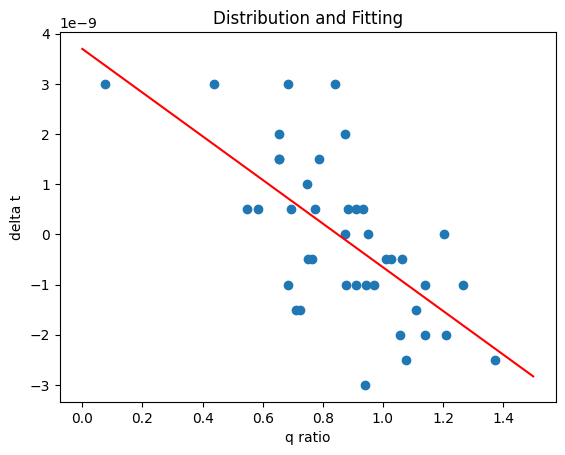

In [8]:
#import ROOT
#from ROOT import TCanvas, RDataFrame
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns


Nphoton=100
n=1.581
DetectorLength=0.605
t1 = np.array([])
t2 = np.array([])
q1 = np.array([])
q2 = np.array([])
uncertainty_t = np.array([])

for i in range(41):
    # Read csv files
    df = pd.read_csv("../ExperimentData/AttenuationLength/lengtha" + str(i) + ".csv")
    t = df['Time(s)'].values
    
    ch1 = df['CH1V'].values
    ch2 = df['CH2V'].values
    
    base1 = np.average(ch1[0:300]) # baseline
    base2 = np.average(ch2[0:300])

    # Find indexes of minimum
    min1 = np.min(ch1)
    min2 = np.min(ch2)
    i1 = np.argmin(ch1) # i1 = np.where(np.min(ch1))
    i2 = np.argmin(ch2)

    # Traverse arrays to find the integral interval
    ch1s = ch1 - (0.1 * min1 + 0.9 * base1)
    ch2s = ch2 - (0.1 * min2 + 0.9 * base2)

    [index1_begin, index1_end, index2_begin, index2_end] = [i1, i1, i2, i2]

    while (ch1s[index1_begin] < 0):
        index1_begin -= 1

    while (ch1s[index1_end] < 0):
        index1_end += 1

    while (ch2s[index2_begin] < 0):
        index2_begin -= 1

    while (ch2s[index2_end] < 0):
        index2_end += 1


    [Q1, Q2] = [0, 0]
    for j in range(index1_begin, index1_end):
        delta_t = t[j + 1] - t[j]
        Q1 += delta_t * (base1 - ch1[j])
        
    for j in range(index2_begin, index2_end):
        delta_t = t[j + 1] - t[j]
        Q2 += delta_t * (base2 - ch2[j])

    t1 = np.append(t1, t[index1_begin])
    t2 = np.append(t2, t[index2_begin])
    q1 = np.append(q1, Q1)
    q2 = np.append(q2, Q2)

    # Uncetainty
    delta_t_begin = np.abs(t[index1_begin] - t[index2_begin])
    uncertainty_t = np.append(uncertainty_t, (t[1] - t[0]) / delta_t_begin * 1.414)

dt = t1 - t2
logq = np.log(q1/q2)
plt.scatter(logq, dt)
plt.title("Distribution and Fitting")
plt.xlabel("q ratio")
plt.ylabel("delta t")

z, cov = np.polyfit(logq, dt, 1, cov=True) # higher power first
slope, intercept, r_value, p_value, std_err = ss.linregress(logq, dt)

t1 = np.linspace(0, 1.5, 100)

plt.plot(t1, t1*slope + intercept, 'r-')
plt.savefig("./figs/dist.png")

L0=-z[0] * 3e8/n

print("Result: ", L0)
print("Correlation: ", r_value**2)
print(np.sqrt(np.diag(cov)))

print("Uncetainty: ", np.sqrt(np.diag(cov))[0] / -z[0])

print("Stat uncertainty :",np.sqrt(np.diag(cov))[0] / -z[0]*L0)


In [9]:
# sysm uncertainty

p=np.exp(-1*DetectorLength/L0)
sigma_photon=np.sqrt(4/Nphoton*p*(1-p))


delta_t=5e-10
c=3e8
sigma_t=delta_t*c/np.sqrt(6)/L0/n

print("Photon uncertainty: ",sigma_photon,"\nTime uncertainty :", sigma_t,"\nSysm uncertainty :",np.sqrt(sigma_photon**2+sigma_t**2),"\nSysm uncertainty :",np.sqrt(sigma_photon**2+sigma_t**2)*L0)



Photon uncertainty:  0.09992390635283664 
Time uncertainty : 0.04692367908061114 
Sysm uncertainty : 0.11039301934121853 
Sysm uncertainty : 0.09112411423978589
